In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import numpy.linalg as la

In [2]:
accuracy, _ = pickle.load(open('info/triple-state-normal-residual-network-3', 'rb'))
parameters, _ = pickle.load(open('parameters/triple-state-normal-residual-network-3', 'rb'))
accuracy

0.915625

In [3]:
def visualize_filters(filters):
    filter_out, filter_in, W, H = filters.shape
    canvas = np.zeros((filter_in * (W + 1) + 1, filter_out * (H + 1) + 1))
    for i in range(filter_in):
        for o in range(filter_out):
            canvas[i * W + i + 1 : (i + 1) * W + i + 1, o * H + o + 1 : (o + 1) * H + o + 1] = filters[o, i]
    pl.figure(figsize=(10, 10))
    pl.imshow(canvas, cmap='Greys', interpolation='nearest')
    pl.axis('off')

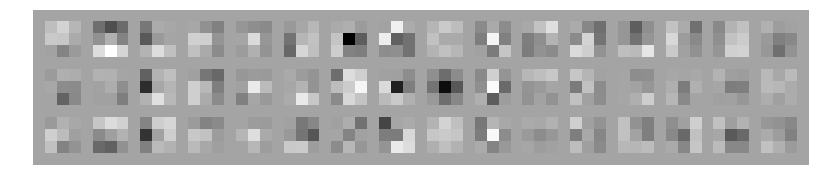

In [4]:
visualize_filters(parameters['transition0_convolution_weight'])

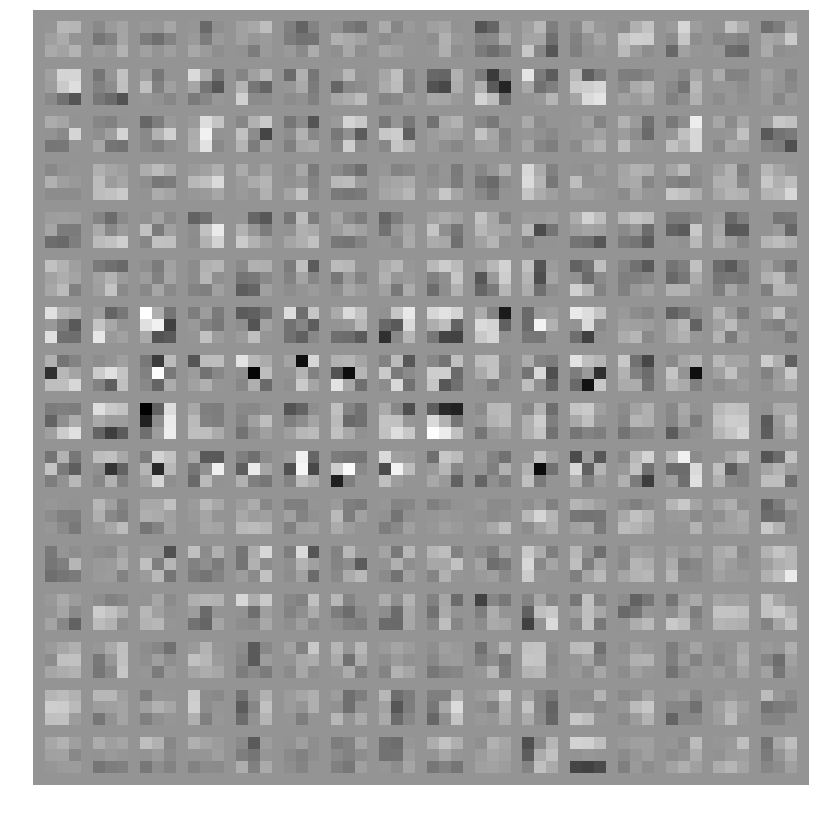

In [5]:
visualize_filters(parameters['convolution0_weight'])

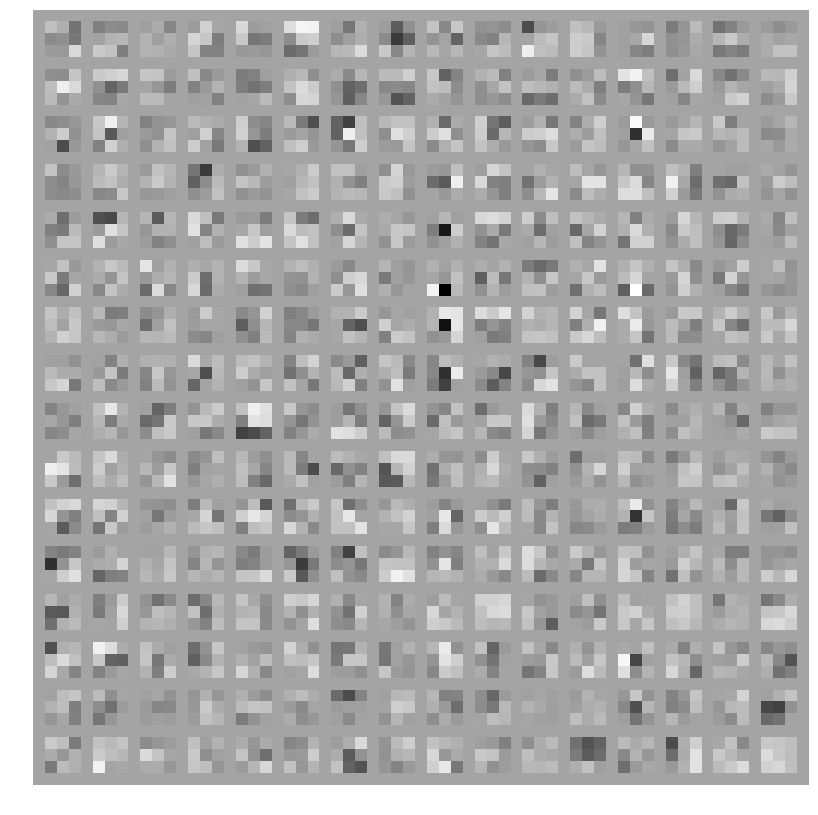

In [6]:
visualize_filters(parameters['convolution1_weight'])

In [7]:
def compare_filters(left, right):
    left = left.reshape(((left.shape[0] * left.shape[1],) + left.shape[2:]))
    right = right.reshape(((right.shape[0] * right.shape[1],) + right.shape[2:]))
    for left_kernel in left:
        for right_kernel in right:
            if np.allclose(left_kernel, right_kernel): print 'close'